import dataset




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.0 MB/s eta 0:00:00


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.4 MB/s eta 0:00:00


In [ ]:

from datasets import load_dataset
raw_dataset = load_dataset("sem_eval_2018_task_1","subtask5.arabic")                         #load arabic dataset from huggingface and save it to disk
raw_dataset.save_to_disk("my-arrow-dataset")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2278 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1518 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/585 [00:00<?, ? examples/s]

Dataset sem_eval_2018_task_1 downloaded and prepared to /root/.cache/huggingface/datasets/sem_eval_2018_task_1/subtask5.arabic/1.1.0/a7c0de8b805f1988b118882fb289ccfbbeb9085c7820b6f046b5887e234af182. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Saving the dataset (0/1 shards):   0%|          | 0/2278 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1518 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/585 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_from_disk
arrowdatasetreloaded = load_from_disk("my-arrow-dataset")                               #load arabic dataset from disk
arrowdatasetreloaded

DatasetDict({
    train: Dataset({
        features: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
        num_rows: 2278
    })
    test: Dataset({
        features: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
        num_rows: 1518
    })
    validation: Dataset({
        features: ['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
        num_rows: 585
    })
})

In [ ]:
import pickle
import re
import matplotlib.pyplot as plt                              #libraries required for data mining
import sys
import statistics

%matplotlib inline

In [ ]:
#import aranorm                                #aranorm contains the necessary functions to clean the data

function which displays a pie chart

In [ ]:
#each sentiment is represented by a color
def show_pie_chart(data):

   labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
   colors = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'yellow', 'brown', 'grey', 'cyan', 'magenta']
   fig, ax = plt.subplots()
   ax.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
   ax.axis('equal')
   plt.show()

Train


**inporting and inspecting data**

In [ ]:
df_arabic_train=arrowdatasetreloaded['train'].to_pandas()                     #import the train file and transform it into a dataframe
df_arabic_train.head()                                                        #show the dataframe

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Ar-00259,ظلينا نتكلم ساعات ساعات رتبت فيها نفسي وبكيت ف...,True,False,False,True,False,False,False,True,True,False,False
1,2018-Ar-02696,كل سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده ي...,False,False,False,False,True,True,True,False,False,False,False
2,2018-Ar-03596,البسطاء يمتلكون أرواح نادره جداتجدهم بمظهر متو...,False,False,False,False,False,True,True,False,False,False,False
3,2018-Ar-02999,مومعقول اللي قاعد يصير فيني هالايام يارب ماينت...,False,False,False,True,False,False,False,False,False,False,False
4,2018-Ar-02716,انا اكثر شخص متناقض بداخلي حب وكره وامل وقنوط ...,True,False,False,False,False,False,False,False,True,False,False


In [ ]:
df_arabic_train.shape                            #display the number of rows and the number of columns

(2278, 13)

In [ ]:
import re
for i in range (2278):
                                                          #display the tweets from the train file
 print(df_arabic_train.Tweet[i])

ظلينا نتكلم ساعات ساعات رتبت فيها نفسي وبكيت فيها مخاوفي مازلت أحس بشعور غريب وكأني رحلت من البيت للتو وهذا الشعور أقدر أتحمله
كل سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده يارب 😍 ❤️ 🎈 🎈
البسطاء يمتلكون أرواح نادره جداتجدهم بمظهر متواضع لكنهم بمحتوى باهض وراقي ينعمون بهدوء النفس لأنهم يمتلكون كنزالقناعة #سنام_المجد_للدعم
مومعقول اللي قاعد يصير فيني هالايام يارب ماينتابني شعور الخوف والتوتر اللهم التركيز وأعلى الدرجاتت
انا اكثر شخص متناقض بداخلي حب وكره وامل وقنوط للحين ماعرفت نفسي
وانتي واسرتك الكريمة بخير و سرور اختي المحترمة 💜 🌹
واللي يغيظ ان اريكسن جاب 11 ووالكر جاب 9 وكوستا جاب 16 ومهزلة يعني عامل تريبل كابتن لاقل واحد جاب نقط 😍
النفاق الإلكتروني عندما تجد مواقع التواصل الإجتماعي مليئة بالأدعية والمساجد فارغة #حسرة
استياء شعبي
الشي الوحيد الي مخليني بهالحساب انو تقريبا محد يعرفني فيه وماني مستعدة اواجه حقيقة اني في حالة انكسار:(
ثانيه واحده بس كدا .. يعني افلام الرعب اللي طول عمري اتفرج عليهم عادي بالنسبالي وكفر دلهاب مرعوبه اتفرج 5 دقايق ع بعض ..
غلطة ياسر المسيليم طبيعية جدا ومتوق

**exploring** **data**

In [ ]:
data=[len(df_arabic_train[df_arabic_train.anger==True]),
      len(df_arabic_train[df_arabic_train.anticipation==True]),
      len(df_arabic_train[df_arabic_train.disgust==True]),
      len(df_arabic_train[df_arabic_train.fear==True]),
      len(df_arabic_train[df_arabic_train.joy==True]),                                                 #table that contains the number of rows for each sentiment
      len(df_arabic_train[df_arabic_train.love==True]),
      len(df_arabic_train[df_arabic_train.optimism==True]),
      len(df_arabic_train[df_arabic_train.pessimism==True]),
      len(df_arabic_train[df_arabic_train.sadness==True]),
      len(df_arabic_train[df_arabic_train.surprise==True]),
       len(df_arabic_train[df_arabic_train.trust==True]),]

data


[899, 206, 433, 391, 605, 562, 561, 499, 842, 47, 120]

1.Descriptive statistics

In [ ]:
mean = statistics.mean(data)                      #a function that calculates the mean
median = statistics.median(data)                  #a function that calculates the median
stdev = statistics.stdev(data)                    #a function that calculates the standard deviation
print(" mean:",mean)
print("\n median:",median)
print("\n standard deviation:",stdev)

 mean: 469.54545454545456

 median: 499

 standard deviation: 271.47167942029006


2.Data visualization

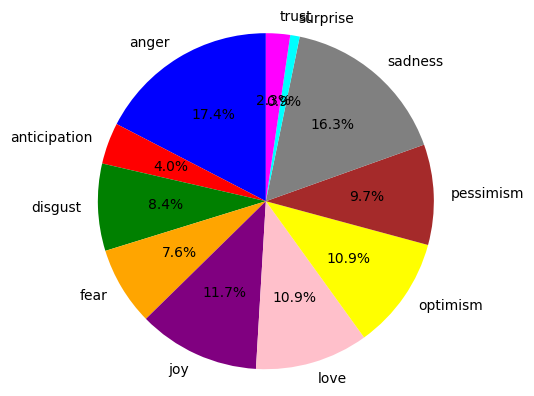

In [ ]:
show_pie_chart(data)                            #the function that displays the pie chart

Test

In [ ]:
df_arabic_test=arrowdatasetreloaded['test'].to_pandas()                 #import the test file and transform it into a dataframe
df_arabic_test.head()                                                   #show the dataframe

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Ar-01385,إنها على وشك ان تصبح السابعه ونصف صباحا وأنت و...,False,False,False,False,False,False,False,True,True,False,False
1,2018-Ar-01012,كل الي اقدر اقوله. كرهتك وليتني ما عرفتك. \n#ندم,True,False,True,False,False,False,False,False,True,False,False
2,2018-Ar-00494,ادري بس بدون صراخ ازعجتني,True,False,False,False,False,False,False,False,True,False,False
3,2018-Ar-02382,محتاجة كائن يشاركني اوقاتي رسم لوحة لحظة نرفزة...,False,True,False,False,False,False,False,False,True,False,False
4,2018-Ar-04029,بجد ايه الكونسبت ال بيخليكى تقلعى الطرحه يوم خ...,True,False,True,False,False,False,False,True,False,False,False


In [ ]:
df_arabic_test.shape                                                      #display the number of rows and the number of columns

(1518, 13)

In [ ]:
import re
for i in range (1518):                                  #display the tweets from the test file

 print(df_arabic_test.Tweet[i])

إنها على وشك ان تصبح السابعه ونصف صباحا وأنت وحيد #بؤس 💔
كل الي اقدر اقوله. كرهتك وليتني ما عرفتك. \n#ندم
ادري بس بدون صراخ ازعجتني
محتاجة كائن يشاركني اوقاتي رسم لوحة لحظة نرفزةوقت فرح او زعل حد يتحمل كل التغيرات وميسبش وقت لاي احساس بالوحدةحاجةكدة زي نفسي بس اتكلم معاها
بجد ايه الكونسبت ال بيخليكى تقلعى الطرحه يوم خطوبتك او فرحك او ف مصيف مثلاا   بجد سؤال دا بقالى كتير عايزه اعرف اجابته
775: بال من الاوادم الي ماتقبلتهم فالبدايه كلش 😩 كنت واجد استاء منك والله اسلوبك كان ينرفز 😂 &lt; آسفه 😂 بس تالي تعودت عليك واحسك صرت لطيف 🌚 😂
ايه الرعب ده لما هم مقتنعين خلاص بيحاولوا يسكتوا الناس ليه و جلام من نوعية الاخوان ركبوا وتخويف و ترهيب و اخر قرف
لو بينا ألف زعل لا تشتكين لغيري أنت حتى الدموع اللي بعينك دمعتي
حمد الله قناعة كنز☺
كثير عرب نشروا اشاعة ان هنالك وثورة ستحدث في #ايران بتاريخ 16/5 لم يحدث شيء الا اشاعات تؤدي لخيبة أمل ويأس مما انا متأكد منه سينتهي الظلم
#جرح السيف خفيف وبيستخبا بس جرح اللسان رخيص وبينهي المحبه 😉
مو فاهمه ليه بعض المقاطع الدينيه صراخ وصدى ونغمه حزيينه.. ليه الاكتئا

In [ ]:
data=[len(df_arabic_test[df_arabic_test.anger==True]),
      len(df_arabic_test[df_arabic_test.anticipation==True]),
      len(df_arabic_test[df_arabic_test.disgust==True]),
      len(df_arabic_test[df_arabic_test.fear==True]),                                #table that contains the number of rows for each sentiment
      len(df_arabic_test[df_arabic_test.joy==True]),
      len(df_arabic_test[df_arabic_test.love==True]),
      len(df_arabic_test[df_arabic_test.optimism==True]),
      len(df_arabic_test[df_arabic_test.pessimism==True]),
      len(df_arabic_test[df_arabic_test.sadness==True]),
      len(df_arabic_test[df_arabic_test.surprise==True]),
       len(df_arabic_test[df_arabic_test.trust==True]),]


data

[609, 158, 316, 295, 393, 367, 344, 377, 579, 38, 77]

1.Descriptive statistics

In [ ]:

mean = statistics.mean(data)                      #a function that calculates the mean
median = statistics.median(data)                  #a function that calculates the median
stdev = statistics.stdev(data)                    #a function that calculates the standard deviation
print(" mean:",mean)
print("\n median:",median)
print("\n standard deviation:",stdev)

 mean: 323

 median: 344

 standard deviation: 180.92097722486469


2.Data visualization

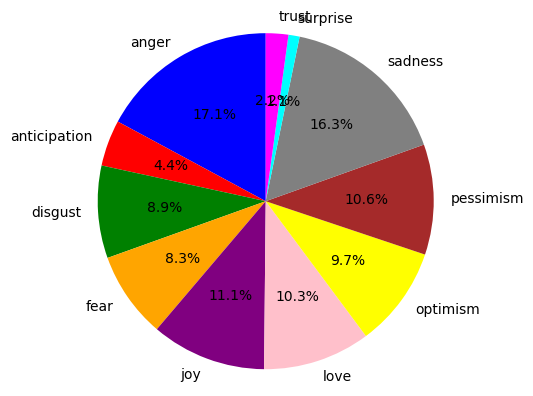

In [ ]:
show_pie_chart(data)                        #the function that displays the pie chart

# validation

In [ ]:
df_arabic_validation=arrowdatasetreloaded['validation'].to_pandas()                 #import the validation file and transform it into a dataframe
df_arabic_validation.head()                                                         #show the dataframe

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Ar-00289,باقي ١٠ دقايق واخلص حلقة سكول الثانيه بس النت ...,True,False,True,False,True,False,False,True,False,False,False
1,2018-Ar-02519,معاناة لما يكون دايماً إحساسك بمحله .....,False,False,False,False,False,False,False,False,True,False,False
2,2018-Ar-01952,لو فيه جائزه اكثر موسوسه تخاف من الامراض فزت ب...,False,False,False,True,False,False,False,True,False,False,False
3,2018-Ar-02912,ما يستفز راحة البال إلا الذكريات ☹️ 💔,True,False,False,False,False,False,False,False,True,False,False
4,2018-Ar-02756,القلب ياوقت والنفس ماهي مرتاحه ونبض القلب ماهو...,False,False,False,True,False,False,False,False,True,False,False


In [ ]:
df_arabic_validation.shape                                              #display the number of rows and the number of columns

(585, 13)

In [ ]:
import re
for i in range (585):                                               #display the tweets from the validation file

 print(df_arabic_validation.Tweet[i])

باقي ١٠ دقايق واخلص حلقة سكول الثانيه بس النت مستلعن 😀
معاناة لما يكون دايماً إحساسك بمحله .....
لو فيه جائزه اكثر موسوسه تخاف من الامراض فزت بهاا انننااا 😃
ما يستفز راحة البال إلا الذكريات ☹️ 💔
القلب ياوقت والنفس ماهي مرتاحه ونبض القلب ماهو مرتاح من تالي الوقت #مستر_طلال_للأضافات
رمضان في نيويورك 😟 الإمساك 3:54ص الإفطار 8:21م ساعات الصيام = 16س و27دقيقه 😭 😭 - يشعر بالانزعاج
` بين الضلوع استقر حبك و هام يا ضحكة سنيني و نعيم الأيام 💭 💖 #قروب_غيم_للدعم
@69Reema69 ي خوفي اتورط معاك ترا حقين مشاكل
اشمئزاز مو صاحي!
الله يسامح الي مقومني من الساعه 1 عشان اودعه💔😥
عندي امتحان توا .. واجباري مش حانقدر نغش 😣😣\nعشان نفطرش \nليييييش هكي
اللهم سعادة البال وارتياح الضمير
مزاجي عصبي متهور احب المغامرات واحب بنفس الوقت " الوحدة " #كل_مغرد_يوصف_نفسه
بالتفكير بالامر هذي أول اجازه من سنه استانس فيها بما انو العام كانت كلها قلق عشان قبول الجامعه
@thansulii ماشاءالله متألقه وين ماكنتي ، وين القاه ؟ وابي توقيعك فيك😻❤️!
#اسعد_غيرك1\nانت مو بس اسعدت العماله ترا اسعدتنا معااهم والله
ليش هاديَة؟.\n-يكفِي الإزعا

In [ ]:
data=[len(df_arabic_validation[df_arabic_validation.anger==True]),
      len(df_arabic_validation[df_arabic_validation.anticipation==True]),
      len(df_arabic_validation[df_arabic_validation.disgust==True]),
      len(df_arabic_validation[df_arabic_validation.fear==True]),
      len(df_arabic_validation[df_arabic_validation.joy==True]),
      len(df_arabic_validation[df_arabic_validation.love==True]),                                      #table that contains the number of rows for each sentiment
      len(df_arabic_validation[df_arabic_validation.optimism==True]),
      len(df_arabic_validation[df_arabic_validation.pessimism==True]),
      len(df_arabic_validation[df_arabic_validation.sadness==True]),
      len(df_arabic_validation[df_arabic_validation.surprise==True]),
       len(df_arabic_validation[df_arabic_validation.trust==True]),]


data

[215, 57, 106, 94, 179, 175, 169, 125, 217, 13, 36]

1.Descriptive statistics

In [ ]:
mean = statistics.mean(data)                      #a function that calculates the mean
median = statistics.median(data)                  #a function that calculates the median
stdev = statistics.stdev(data)                    #a function that calculates the standard deviation
print(" mean:",mean)
print("\n median:",median)
print("\n standard deviation:",stdev)

 mean: 126

 median: 125

 standard deviation: 70.9337719284686


2.Data visualization

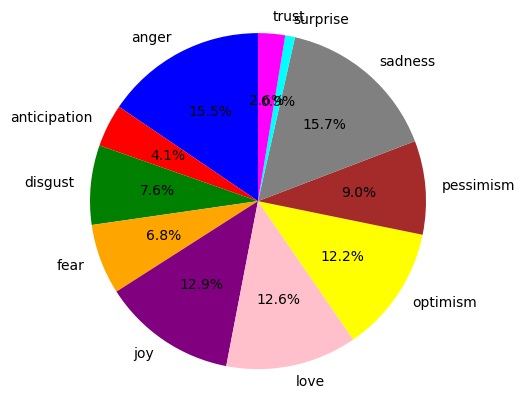

In [ ]:
show_pie_chart(data)                                 #the function that displays the pie chart

**data cleaning**



In [ ]:
df1=pd.concat([df_arabic_train,df_arabic_test],ignore_index=True)
df2=pd.concat([df1,df_arabic_validation],ignore_index=True)
df2

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Ar-00259,ظلينا نتكلم ساعات ساعات رتبت فيها نفسي وبكيت ف...,True,False,False,True,False,False,False,True,True,False,False
1,2018-Ar-02696,كل سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده ي...,False,False,False,False,True,True,True,False,False,False,False
2,2018-Ar-03596,البسطاء يمتلكون أرواح نادره جداتجدهم بمظهر متو...,False,False,False,False,False,True,True,False,False,False,False
3,2018-Ar-02999,مومعقول اللي قاعد يصير فيني هالايام يارب ماينت...,False,False,False,True,False,False,False,False,False,False,False
4,2018-Ar-02716,انا اكثر شخص متناقض بداخلي حب وكره وامل وقنوط ...,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,2018-Ar-02091,ادهشتهم فأرعبتهم ،، هذا الشبل من ذاك الأسد #م...,False,True,False,True,True,True,False,False,False,False,True
4377,2018-Ar-00343,بس ده ميمنعش ان احيانا بتصدف معايا و خوفي ده ب...,False,False,False,True,False,False,True,False,True,False,True
4378,2018-Ar-02481,اعلان مستشفى مجدى يعقوب بتاع احمد حلمى و دنيا ...,False,False,False,False,True,True,True,False,False,True,False
4379,2018-Ar-01638,النفوس الطيبه يطيب وصالها اسعدكم الله بكل أمل ...,False,False,False,False,True,True,True,False,False,False,False


In [ ]:
df2.shape

(4381, 13)

In [ ]:
import re
import string


COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")


""" https://github.com/cltk/cltk/blob/master/cltk/corpus/arabic/alphabet.py """
WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text


def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,' يوجدايميل ')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text):
    return re.sub(r"http\S+|www.\S+", " يوجدرابط ", text)
    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    return re.sub(r'\d{10}', ' يوجدرقمهاتف ', text)
    # return re.sub(r'\d{10}', ' hasPhoneNumber ', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

'''
very important note:
    The order of the execution of the these function is extremely crucial.
'''
def normalize_tweet(text):
    new_text = text.lower()
    new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
#    new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)

    return new_text

In [ ]:
print(df2.Tweet[1])

كل سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده يارب 😍 ❤️ 🎈 🎈


In [ ]:
#df2.Tweet = df2.Tweet.apply(lambda x: strip_tashkeel(x))
#df2.Tweet = df2.Tweet.apply(lambda x: strip_tatweel(x))
#df2.Tweet = df2.Tweet.apply(lambda x: remove_non_arabic(x))
#df2.Tweet = df2.Tweet.apply(lambda x: keep_arabic_english_n_symbols(x))
#df2.Tweet = df2.Tweet.apply(lambda x: normalize_hamza(x))
#df2.Tweet = df2.Tweet.apply(lambda x: normalize_spellerrors(x))
#df2.Tweet = df2.Tweet.apply(lambda x: normalize_lamalef(x))
#df2.Tweet = df2.Tweet.apply(lambda x: normalize_arabic_text(x))
#df2.Tweet = df2.Tweet.apply(lambda x: remove_underscore(x))
#df2.Tweet = df2.Tweet.apply(lambda x: remove_retweet_tag(x))
#df2.Tweet = df2.Tweet.apply(lambda x: replace_emails(x))
#df2.Tweet = df2.Tweet.apply(lambda x: replace_urls(x))
#df2.Tweet = df2.Tweet.apply(lambda x: convert_eastern_to_western_numerals(x))
#df2.Tweet = df2.Tweet.apply(lambda x: remove_all_punctuations(x))
#df2.Tweet = df2.Tweet.apply(lambda x: remove_emojis(x))
#df2.Tweet = df2.Tweet.apply(lambda x: replace_phone_numbers(x))
#df2.Tweet = df2.Tweet.apply(lambda x: remove_extra_spaces(x))
df2.Tweet = df2.Tweet.apply(lambda x: normalize_tweet(x))


for i in range (4381):
  print(df2.Tweet[i])
  #df2.Tweet[i]=aranorm.normalize_tweet(df2.Tweet[i])               #apply the normalize_tweet function from the aranorm file to the data
                                                                                           # and display it

In [ ]:
df2 =df2.drop_duplicates('Tweet').reset_index(drop=True)      #delete duplicated lines

df2.shape

(4367, 13)

In [ ]:
for i in range(4367):                                                                 #transform false into 0 and true into 1
  if df2.anger[i]==False:
    df2.anger[i]=0
  else:
    df2.anger[i]=1


  if df2.anticipation[i]==False:
    df2.anticipation[i]=0
  else:
    df2.anticipation[i]=1


  if df2.disgust[i]==False:
    df2.disgust[i]=0
  else:
    df2.disgust[i]=1


  if df2.fear[i]==False:
    df2.fear[i]=0
  else:
    df2.fear[i]=1

  if df2.joy[i]==False:
    df2.joy[i]=0
  else:
    df2.joy[i]=1


  if df2.love[i]==False:
    df2.love[i]=0
  else:
    df2.love[i]=1


  if df2.optimism[i]==False:
    df2.optimism[i]=0
  else:
    df2.optimism[i]=1


  if df2.pessimism[i]==False:
    df2.pessimism[i]=0
  else:
    df2.pessimism[i]=1


  if df2.sadness[i]==False:
    df2.sadness[i]=0
  else:
    df2.sadness[i]=1


  if df2.surprise[i]==False:
    df2.surprise[i]=0
  else:
    df2.surprise[i]=1


  if df2.trust[i]==False:
    df2.trust[i]=0
  else:
    df2.trust[i]=1

df2

<ipython-input-33-b356055ddcff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.anger[i]=1
<ipython-input-33-b356055ddcff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.anticipation[i]=0
<ipython-input-33-b356055ddcff>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.disgust[i]=0
<ipython-input-33-b356055ddcff>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Ar-00259,ظلينا نتكلم ساعات ساعات رتبت فيها نفسي وبكيت ف...,1,0,0,1,0,0,0,1,1,0,0
1,2018-Ar-02696,كل سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده يارب,0,0,0,0,1,1,1,0,0,0,0
2,2018-Ar-03596,البسطاء يمتلكون ارواح نادره جداتجدهم بمظهر متو...,0,0,0,0,0,1,1,0,0,0,0
3,2018-Ar-02999,مومعقول اللي قاعد يصير فيني هالايام يارب ماينت...,0,0,0,1,0,0,0,0,0,0,0
4,2018-Ar-02716,انا اكثر شخص متناقض بداخلي حب وكره وامل وقنوط ...,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4362,2018-Ar-02091,ادهشتهم فارعبتهم هذا الشبل من ذاك الاسد محمد ب...,0,1,0,1,1,1,0,0,0,0,1
4363,2018-Ar-00343,بس ده ميمنعش ان احيانا بتصدف معايا و خوفي ده ب...,0,0,0,1,0,0,1,0,1,0,1
4364,2018-Ar-02481,اعلان مستشفي مجدي يعقوب بتاع احمد حلمي و دنيا ...,0,0,0,0,1,1,1,0,0,1,0
4365,2018-Ar-01638,النفوس الطيبه يطيب وصالها اسعدكم الله بكل امل ...,0,0,0,0,1,1,1,0,0,0,0


In [ ]:
#This matrix was made to find out if each sentence contains more than one emotion.
import numpy as np
y=np.empty(shape=(4367,11), dtype=np.float16)
for i in range(4367):
  y[i][0]=df2.anger[i]
  y[i][1]=df2.anticipation[i]
  y[i][2]=df2.disgust[i]
  y[i][3]=df2.fear[i]
  y[i][4]=df2.joy[i]
  y[i][5]=df2.love[i]
  y[i][6]=df2.optimism[i]
  y[i][7]=df2.pessimism[i]
  y[i][8]=df2.sadness[i]
  y[i][9]=df2.surprise[i]
  y[i][10]=df2.trust[i]
y

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float16)

**remove** **stop** **words**

In [ ]:
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
arabic= set(nltk.corpus.stopwords.words("arabic"))


In [ ]:
len(arabic)

701

In [ ]:
for i in range (4367):
  df2.Tweet[i]=" ".join([word for word in df2.Tweet[i].split() if word not in (arabic)])
  print(df2.Tweet[i])

ظلينا نتكلم ساعات ساعات رتبت نفسي وبكيت مخاوفي مازلت احس بشعور غريب وكاني رحلت البيت للتو وهذا الشعور اقدر اتحمله
سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده يارب
البسطاء يمتلكون ارواح نادره جداتجدهم بمظهر متواضع لكنهم بمحتوي باهض وراقي ينعمون بهدوء النفس لانهم يمتلكون كنزالقناعه سنام المجد للدعم
مومعقول اللي قاعد يصير فيني هالايام يارب ماينتابني شعور الخوف والتوتر اللهم التركيز واعلي الدرجاتت
انا اكثر شخص متناقض بداخلي حب وكره وامل وقنوط للحين ماعرفت نفسي
وانتي واسرتك الكريمه بخير سرور اختي المحترمه
واللي يغيظ ان اريكسن جاب ووالكر جاب وكوستا جاب ومهزله يعني عامل تريبل كابتن لاقل جاب نقط
النفاق الالكتروني عندما تجد مواقع التواصل الاجتماعي مليءه بالادعيه والمساجد فارغه حسره
استياء شعبي
الشي الوحيد الي مخليني بهالحساب انو تقريبا محد يعرفني وماني مستعده اواجه حقيقه اني حاله انكسار
ثانيه واحده كدا يعني افلام الرعب اللي طول عمري اتفرج عليهم عادي بالنسبالي وكفر دلهاب مرعوبه اتفرج دقايق
غلطه ياسر المسيليم طبيعيه جدا ومتوقعه لاعب اقدامه مرتجفه ضم الزوري المبتعد المباريات وتحجج بالابتعاد عشان يزح

# **lemmatization**

In [ ]:

from nltk.stem.isri import ISRIStemmer
nltk.download('punkt')

# create an instance of the ISRIStemmer class
stemmer = ISRIStemmer()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
for i in range(4367):
  # tokenize an Arabic sentence
  sentence = df2.Tweet[i]
  tokens = nltk.word_tokenize(sentence)

  # lemmatize each word in the sentence
  lemmas = []
  for token in tokens:
      lemma = stemmer.stem(token)
      lemmas.append(lemma)

  # print the df2.Tweet[i]

  df2.Tweet[i] = ' '.join(lemmas)
  print(df2.Tweet[i])

ظلي كلم ساع ساع رتب نفس وبك خاف ازل احس شعر غرب وكا رحل بيت لتو وهذا شعر قدر حمل
سنه ونت بخر قلب وكل سنه ونت سعد يرب
سطء ملك روح ندر جداتجد ظهر واضع لكن حتو بهض ورق نعم هدء نفس لان ملك كنزالقناعه سنم مجد دعم
مومعقول الل قعد يصر فين هالايام يرب ماينتاب شعر خوف وتر لهم ركز وعل درج
انا كثر شخص ناقض دخل حب وكر ومل قنط حين اعرف نفس
ونت وسر كرم بخر سرر اخت حرم
ولل يغظ ان ريكس جاب لكر جاب وكس جاب هزل يعن عمل ريبل كاب لقل جاب نقط
نفق كترو عند تجد وقع وصل جمع ليء ادع سجد فرغ حسر
ياء شعب
الش وحد الي خلي بهالحساب انو قرب محد عرف وما عده وجه حقق اني حله كسر
ثني وحد كدا يعن فلم رعب الل طول عمر فرج علي عدي سبل كفر دلهاب رعب فرج دقيق
غلط يسر مسيليم طبع جدا توقع لعب قدم رجف ضم زور بعد بري حجج بعد عشن زحلق عوس
انا غضب رءح فوه صءم تزد غضب كثر قرف
عبد رفع ضغط عند ولد جار يشب عبد ودي اتط بطن وبط عبد
اعل بهج جدا ليه لمس
مصر احن شتغل عشن نجب فلس نرح بيه شغل شعر ياء
حمدلل اذا حست اني رضه ربي احس سعد دخل لذي بين وبين الل عمر الذ بين وبين ناس خرب
ليش سوس تعذ شيط كثر غفر حتي انا يجي لني شغل علم قرن درس الل خفي 

# modelling 2


In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ktrain
from ktrain import text

In [ ]:
#split our data into 2 pieces train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df2.Tweet.values, y, test_size=0.2)

In [ ]:
class_names = ['anger','anticipation','disgust','fear','joy','love','optimism','pessimism','sadness','surprise','trust']
#The text must be preprocessed in a specific way for use with BERT.
#we add [PAD] at the end if lengthof our text less then maxlen and add [cls] of begening of each sentences and [sep] at the end .
#This is accomplished by setting preprocess_mode to ‘bert’.
#The BERT model and vocabulary will be automatically downloaded


#The function returns two tuples, one for the training data and one for the testing data.
#Each tuple contains two arrays.The first array contains the preprocessed text data,and the second array contains the corresponding labels.

#maxlen is a parameter in texts_from_array to know the maximum length of our text


#max_features is a parameter in texts_from_array :determines the maximum number of unique words that will be used in the vocabulary for text preprocessing
#The max_features parameter in texts_from_array function is used to limit the size of the vocabulary by only including the most frequently occurring words in the corpus.
#The size of the vocabulary and the dimensionality of the word vectors can have a significant impact on the performance of the neural network.
#A larger vocabulary and higher-dimensional word vectors can capture more nuances and subtleties in the text data
#In this example, max_features is set to 35000 which limits the size of the vocabulary to the 35000 most frequent words in the text corpus

#The preprocessed texts have undergone various preprocessing steps, such as tokenization and normalization, depending on the configuration of the "preproc" object
#This object can be used to preprocess new texts that are not part of the original input data, which can be useful when deploying the model in a production environment.
(X_train,y_train),(X_test,y_test),preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                            x_test=x_test, y_test=y_test,
                                            class_names=class_names,
                                            preprocess_mode='bert',
                                            maxlen=350,
                                            max_features=35000)

preprocessing train...
language: ar


Is Multi-Label? True
preprocessing test...
language: ar


task: text classification


In [ ]:
#Loading the pretrained BERT for text classification
model = text.text_classifier('bert', train_data=(X_train, y_train), preproc=preproc)

Is Multi-Label? True
maxlen is 350


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
# The get_learner function in ktrain is used to create a Learner object, which is the main object used to train a deep learning model.
learner = ktrain.get_learner(model, train_data=(X_train, y_train),
                             val_data=(X_test, y_test),
                             batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
583/583 [==============================] - 348s 544ms/step - loss: 0.5351 - accuracy: 0.2514
Epoch 2/1024
583/583 [==============================] - 326s 559ms/step - loss: 0.5444 - accuracy: 0.2067
Epoch 3/1024
583/583 [==============================] - 108s 185ms/step - loss: 2.5676 - accuracy: 0.1297


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


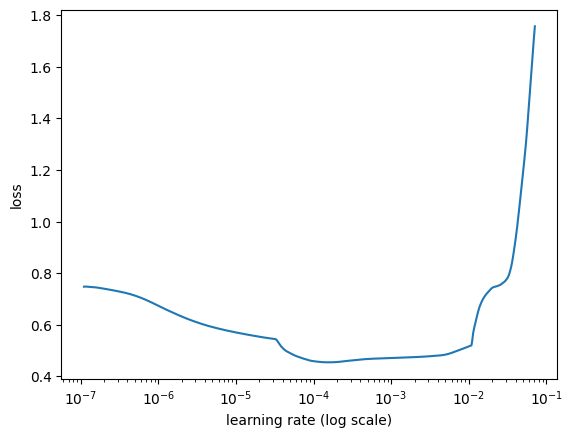

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
learner.fit_onecycle(2e-5,3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
583/583 [==============================] - 392s 633ms/step - loss: 0.4624 - accuracy: 0.3095 - val_loss: 0.4399 - val_accuracy: 0.5286
Epoch 2/3
583/583 [==============================] - 367s 630ms/step - loss: 0.3894 - accuracy: 0.4698 - val_loss: 0.3833 - val_accuracy: 0.4485
Epoch 3/3
583/583 [==============================] - 353s 605ms/step - loss: 0.3261 - accuracy: 0.5729 - val_loss: 0.3789 - val_accuracy: 0.5229


In [ ]:
#Validation
learner.validate(val_data=(X_test, y_test), class_names=class_names)

/usr/local/lib/python3.9/dist-packages/ktrain/core.py:166: UserWarning: multilabel confusion matrices not yet supported
  warnings.warn("multilabel confusion matrices not yet supported")


testing with other inputs


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

In [ ]:
import time

message = 'لقد انفصلت على حبيبي'

start_time = time.time()
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: [('anger', 0.058236662), ('anticipation', 0.05307469), ('disgust', 0.024365038), ('fear', 0.05544098), ('joy', 0.14080316), ('love', 0.32775337), ('optimism', 0.13721251), ('pessimism', 0.1500288), ('sadness', 0.7626228), ('surprise', 0.009981299), ('trust', 0.02371973)] (4.03)


Saving Bert model

In [ ]:
#save the predictor for later use
#predictor.save("/content/drive/My Drive/predictor_aramodelbert.hdf5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content

aranorm.py  drive  my-arrow-dataset  __pycache__  sample_data


In [ ]:
!ls /content/drive

 model_aramodelbert.hdf5  'My Drive'   my_model.h5


In [ ]:

from tensorflow.keras.models import load_model
model.save('/content/drive/model_aramodelbert.hdf5')
